In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_5568/900850709.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/hj/Documents/무제/train_train.csv", sep=',')
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
43948,RD_F_J_20220127,2022-01-27,RD,F,J,522900.0,536.0
43949,RD_F_J_20220128,2022-01-28,RD,F,J,435800.0,588.0
43950,RD_F_J_20220129,2022-01-29,RD,F,J,422700.0,623.0
43951,RD_F_J_20220130,2022-01-30,RD,F,J,484440.0,481.0


In [3]:
test_df = pd.read_csv("/Users/hj/Documents/무제/train_test.csv", sep=',')
test_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20220201,2022-02-01,TG,A,J,0.0,0.0
1,TG_A_J_20220202,2022-02-02,TG,A,J,0.0,0.0
2,TG_A_J_20220203,2022-02-03,TG,A,J,0.0,0.0
3,TG_A_J_20220204,2022-02-04,TG,A,J,535.5,6065.0
4,TG_A_J_20220205,2022-02-05,TG,A,J,5893.0,3113.0
...,...,...,...,...,...,...,...
1087,RD_F_J_20220224,2022-02-24,RD,F,J,478500.0,532.0
1088,RD_F_J_20220225,2022-02-25,RD,F,J,568800.0,520.0
1089,RD_F_J_20220226,2022-02-26,RD,F,J,478320.0,509.0
1090,RD_F_J_20220227,2022-02-27,RD,F,J,0.0,0.0


In [4]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43953 entries, 0 to 43952
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           43953 non-null  object        
 1   timestamp    43953 non-null  datetime64[ns]
 2   item         43953 non-null  object        
 3   corporation  43953 non-null  object        
 4   location     43953 non-null  object        
 5   supply(kg)   43953 non-null  float64       
 6   price(원/kg)  43953 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.3+ MB


In [6]:
# timestamp : year / month / day 쪼개기

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek  ## 무슨요일인지 확인 

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = df['timestamp'].dt.month
test_df['day'] = df['timestamp'].dt.day
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...
43948,RD_F_J_20220127,2022-01-27,RD,F,J,522900.0,536.0,2022,1,27,3
43949,RD_F_J_20220128,2022-01-28,RD,F,J,435800.0,588.0,2022,1,28,4
43950,RD_F_J_20220129,2022-01-29,RD,F,J,422700.0,623.0,2022,1,29,5
43951,RD_F_J_20220130,2022-01-30,RD,F,J,484440.0,481.0,2022,1,30,6


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, make_scorer
import math # mse에 루트 씌우기 위해

In [8]:
# 범주형 데이터 인코딩 - 라벨 인코딩

encoding_columns = ['item', 'corporation', 'location']
not_encoding_columns = ['ID', 'timestamp', 'supply(kg)', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [9]:
# 범주형 데이터 변환

enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [10]:
d1 = df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [11]:
d2 = df[not_encoding_columns]
d2.head()

,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [12]:
data = d1.join(d2)
data.head()

,item,corporation,location,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,4,0,0,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,4,0,0,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,4,0,0,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,4,0,0,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [13]:
# 데이터셋 분할 

X = data.drop(columns=['supply(kg)','price(원/kg)','ID','timestamp'])
y = data['price(원/kg)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

,item,corporation,location,year,month,day,dayofweek
0,4,0,0,2019,1,1,1
1,4,0,0,2019,1,2,2
2,4,0,0,2019,1,3,3
3,4,0,0,2019,1,4,4
4,4,0,0,2019,1,5,5
...,...,...,...,...,...,...,...
43948,3,5,0,2022,1,27,3
43949,3,5,0,2022,1,28,4
43950,3,5,0,2022,1,29,5
43951,3,5,0,2022,1,30,6


- 의사결정나무

In [15]:

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
pred_dt_train = tree.predict(X_train)
pred_dt_test = tree.predict(X_test)
# acc_train = accuracy_score(y_train, pred_dt_train)
# acc_test = accuracy_score(y_test, pred_dt_test)
# f1_train = f1_score(y_train, pred_train)
# f1_test = f1_score(y_test, pred_test)
# print(f"accuracy : 학습: {acc_train}, 테스트: {acc_test}")
# print(f"f1 score : 학습: {f1_train}, 테스트: {f1_test}")

# mse_train = mean_squared_error(y_train, pred_dt_train)
# mse_test = mean_squared_error(y_test, pred_dt_test)

# print(f"MSE 학습: {mse_train}, 테스트: {mse_test}")

# mae_train = mean_absolute_error(y_train, pred_dt_train)
# mae_test = mean_absolute_error(y_test, pred_dt_test)

# print(f"MAE 학습: {mae_train}, 테스트: {mae_test}")

dt_rmse_train = np.sqrt(mean_squared_error(y_train, pred_dt_train))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, pred_dt_test))
print(f"RMSE 학습: {dt_rmse_train}, 테스트: {dt_rmse_test}")

dt_r2_test = r2_score(y_test, pred_dt_test)
print(f"r2_score: {dt_r2_test}")

RMSE 학습: 0.0, 테스트: 1215.436084362578
r2_score: 0.6440423023847883


- 랜덤포레스트

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:

rf_params = {'n_estimators':[50, 100, 150],  # 기본 100
             'max_depth': [5,10,15],  # 기본 none
             'min_samples_split': [0.5,1],  # 기본 2
             'max_features':[5]}

# rf_model_2 = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, refit='f1', n_jobs=-1, verbose=1)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# rf_model_2.best_params_

In [19]:
pred_rf_train = rf_model.predict(X_train)
pred_rf_test = rf_model.predict(X_test)
rf_rmse_train = math.sqrt(mean_squared_error(y_train, pred_rf_train))
rf_rmse_test = math.sqrt(mean_squared_error(y_test, pred_rf_test))
print(f"RMSE 학습: {rf_rmse_train}, 테스트: {rf_rmse_test}")

rf_r2_test = r2_score(y_test, pred_rf_test)
print(f"r2_score: {rf_r2_test}")
# rf_mae_train = mean_absolute_error(y_train, pred_rf_train)
# rf_mae_test = mean_absolute_error(y_test, pred_rf_test)
# print(f"MAE 학습: {rf_mae_train}, 테스트: {rf_mae_test}")

RMSE 학습: 323.6127027193748, 테스트: 888.8865447731122
r2_score: 0.8096175978978242


/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_5568/1955053676.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top, y=ftr_top.index, palette="Blues_d")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

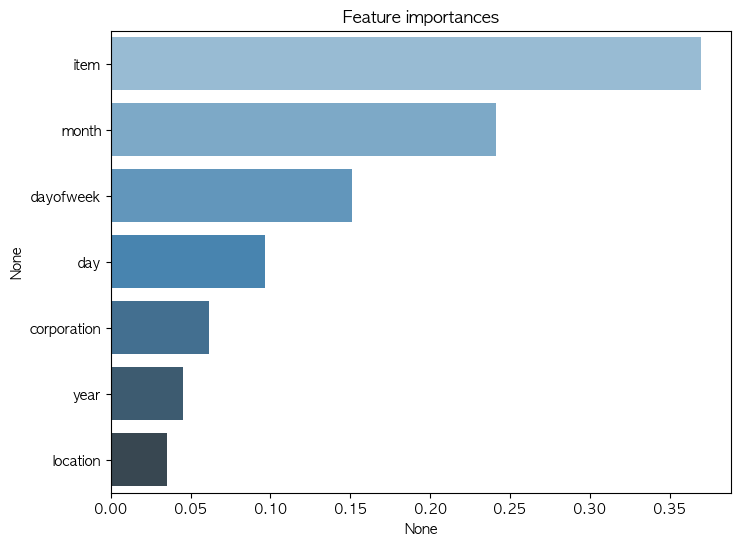

In [20]:
## Feature importances

ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# palette = sns.color_palette("Set2")
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index, palette="Blues_d")
plt.show()

- XGBoost

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_params = {'learning_rate': [0.3, 0.4, 0.2],   # leaning_rate: 0.3 기본값 높을수로 과적합되기 쉬움
              'n_estimators': [100, 120, 150],  # 100이 기본값
              'max_depth': [3, 5, 6, 7]}  # 기본값 6

xgb_model = GridSearchCV(XGBRegressor(random_state=42), param_grid=xgb_params, cv=5, refit='f1', n_jobs=-1, verbose=1)

# xgb_clf = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

pred_xgb_train = xgb_model.predict(X_train)
pred_xgb_test = xgb_model.predict(X_test)

xgb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_xgb_train))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, pred_xgb_test))
print(f"RMSE 학습: {xgb_rmse_train}, 테스트: {xgb_rmse_test}")

xgb_r2_test = r2_score(y_test, pred_xgb_test)
print(f"r2_score: {xgb_r2_test}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
RMSE 학습: 691.1039228913789, 테스트: 898.062252642747
r2_score: 0.8056667908076486


In [22]:
xgb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}

- lightGBM

In [23]:
import lightgbm as lgb

lgb_clf = lgb.LGBMRegressor(random_state=42) #num_leaves=31, objective='regression'
lgb_clf.fit(X_train, y_train)
pred_lgb_train = lgb_clf.predict(X_train)
pred_lgb_test = lgb_clf.predict(X_test)

lgb_mae_train = mean_absolute_error(y_train, pred_lgb_train)
lgb_mae_test = mean_absolute_error(y_test, pred_lgb_test)
print(f"MAE 학습: {lgb_mae_train}, 테스트: {lgb_mae_test}")

lgb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_lgb_train))
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, pred_lgb_test))
print(f"RMSE 학습: {lgb_rmse_train}, 테스트: {lgb_rmse_test}")

lgb_r2_test = r2_score(y_test, pred_lgb_test)
print(f"r2_score: {lgb_r2_test}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 30767, number of used features: 7
[LightGBM] [Info] Start training from score 1096.376052
MAE 학습: 368.36473885981854, 테스트: 400.28482197204073
RMSE 학습: 817.150431806099, 테스트: 911.8946162529509
r2_score: 0.7996342709514526


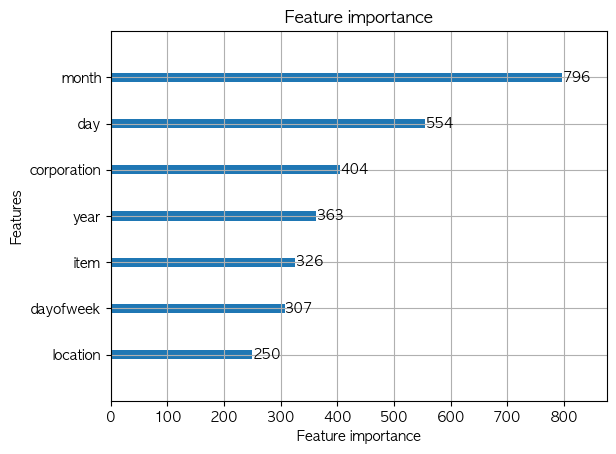

In [24]:
lgb.plot_importance(lgb_clf, max_num_features=10, importance_type='split')
plt.show()

- Catboost 

In [25]:
import catboost as cb
from catboost import CatBoostRegressor

cat_model = cb.CatBoostRegressor(random_state=42) #iterations=100, depth=10, learning_rate=0.05
cat_model.fit(X_train, y_train)

pred_cb_train = cat_model.predict(X_train)
pred_cb_test = cat_model.predict(X_test)

cb_mae_train = mean_absolute_error(y_train, pred_cb_train)
cb_mae_test = mean_absolute_error(y_test, pred_cb_test)
print(f"MAE 학습: {cb_mae_train}, 테스트: {cb_mae_test}")

cb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_cb_train))
cb_rmse_test = np.sqrt(mean_squared_error(y_test,pred_cb_test))
print(f"RMSE 학습: {cb_rmse_train}, 테스트: {cb_rmse_test}")

cb_r2_test = r2_score(y_test, pred_cb_test)
print(f"r2_score: {cb_r2_test}")

Learning rate set to 0.070355
0:	learn: 1913.0327347	total: 58.4ms	remaining: 58.4s
1:	learn: 1828.6734947	total: 61.6ms	remaining: 30.7s
2:	learn: 1751.8187060	total: 64ms	remaining: 21.3s
3:	learn: 1682.2855782	total: 66.4ms	remaining: 16.5s
4:	learn: 1620.0439824	total: 68.9ms	remaining: 13.7s
5:	learn: 1563.7091757	total: 71.2ms	remaining: 11.8s
6:	learn: 1513.3333429	total: 73.5ms	remaining: 10.4s
7:	learn: 1468.6937596	total: 77.4ms	remaining: 9.6s
8:	learn: 1427.7994164	total: 79.8ms	remaining: 8.79s
9:	learn: 1390.6279404	total: 82.2ms	remaining: 8.14s
10:	learn: 1356.5877243	total: 85.3ms	remaining: 7.67s
11:	learn: 1328.1178829	total: 89.4ms	remaining: 7.36s
12:	learn: 1302.8748417	total: 91.8ms	remaining: 6.97s
13:	learn: 1278.8818732	total: 94.2ms	remaining: 6.63s
14:	learn: 1258.4655809	total: 97.8ms	remaining: 6.42s
15:	learn: 1239.9743654	total: 100ms	remaining: 6.17s
16:	learn: 1221.7876904	total: 103ms	remaining: 5.94s
17:	learn: 1208.4160055	total: 105ms	remaining: 5.

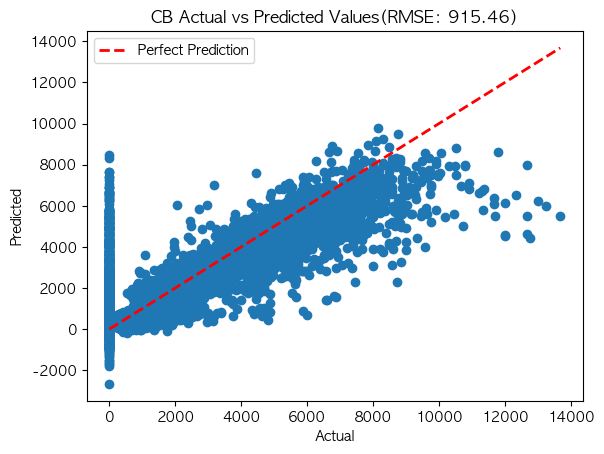

In [26]:
plt.scatter(y_test, pred_cb_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title(f'CB Actual vs Predicted Values(RMSE: {round(cb_rmse_test, 2)})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [27]:
ohe = OneHotEncoder(sparse_output=False)

train_encoded_features = ohe.fit_transform(df[['item','corporation','location']])
train_item_encoded_df = pd.DataFrame(train_encoded_features, columns=ohe.get_feature_names_out(['item', 'corporation', 'location']))
train_df_encoded = pd.concat([df, train_item_encoded_df], axis = 1)

print(train_df_encoded)

                    ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
43948  RD_F_J_20220127 2022-01-27   RD           F        J    522900.0   
43949  RD_F_J_20220128 2022-01-28   RD           F        J    435800.0   
43950  RD_F_J_20220129 2022-01-29   RD           F        J    422700.0   
43951  RD_F_J_20220130 2022-01-30   RD           F        J    484440.0   
43952  RD_F_J_20220131 2022-01-31   RD           F        J         0.0   

       price(원/kg)  year  month  day  ...  item_RD  item_TG  corporation_A  \
0              0.0  2

In [28]:
model2 = LinearRegression()
X = train_df_encoded[['year','month','day','dayofweek','item_BC','item_CB','item_CR','item_RD','item_TG','corporation_A','corporation_B','corporation_C','corporation_D','corporation_E','corporation_F','location_J','location_S']]
y = train_df_encoded[['price(원/kg)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model2.fit(X_train, y_train)

LinearRegression()

In [29]:
pred_lg2_train = model2.predict(X_train)
pred_lg2_test = model2.predict(X_test)

lg2_rmse_train = np.sqrt(mean_squared_error(y_train, pred_lg2_train))
lg2_rmse_test = np.sqrt(mean_squared_error(y_test,pred_lg2_test))
print(f"RMSE 학습: {lg2_rmse_train}, 테스트: {lg2_rmse_test}")

lg2_r2_test = r2_score(y_test, pred_lg2_test)
print(f"r2_score: {lg2_r2_test}")

RMSE 학습: 1556.1713267710513, 테스트: 1589.0013864413536
r2_score: 0.3916091274500044


### 모델 별 평가지표 점수 비교

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_5568/2317614903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

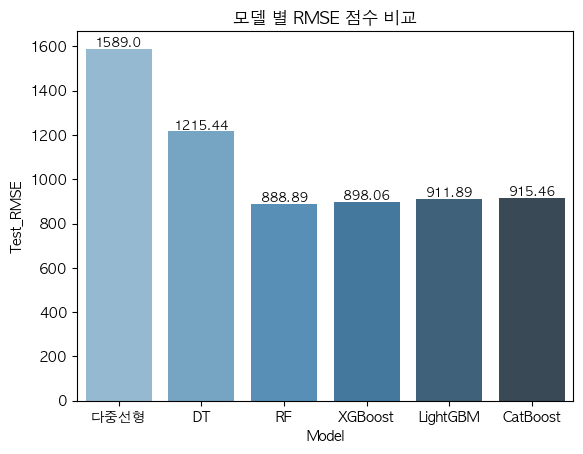

In [30]:
rmse_test = [lg2_rmse_test, dt_rmse_test, rf_rmse_test, xgb_rmse_test, lgb_rmse_test, cb_rmse_test]
recap_model = ["다중선형", "DT", "RF", "XGBoost", "LightGBM", "CatBoost"]
df_recap = pd.DataFrame({'Model':recap_model, 'Test_RMSE':rmse_test})
ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')
plt.title("모델 별 RMSE 점수 비교")
for i, v in enumerate(recap_model):
    plt.text(v, rmse_test[i], f"{round(rmse_test[i],2)}",
             fontsize= 9,
             horizontalalignment='center',
             verticalalignment='bottom')

## Test-Test 정답 비교

In [31]:
test_df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20220201,2022-02-01,TG,A,J,0.0,0.0,2022,1,1,1
1,TG_A_J_20220202,2022-02-02,TG,A,J,0.0,0.0,2022,1,2,2
2,TG_A_J_20220203,2022-02-03,TG,A,J,0.0,0.0,2022,1,3,3
3,TG_A_J_20220204,2022-02-04,TG,A,J,535.5,6065.0,2022,1,4,4
4,TG_A_J_20220205,2022-02-05,TG,A,J,5893.0,3113.0,2022,1,5,5


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1092 non-null   object        
 1   timestamp    1092 non-null   datetime64[ns]
 2   item         1092 non-null   object        
 3   corporation  1092 non-null   object        
 4   location     1092 non-null   object        
 5   supply(kg)   1092 non-null   float64       
 6   price(원/kg)  1092 non-null   float64       
 7   year         1092 non-null   int32         
 8   month        1092 non-null   int32         
 9   day          1092 non-null   int32         
 10  dayofweek    1092 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 76.9+ KB


In [33]:
encoding_columns = ['item', 'corporation', 'location'] 
not_encoding_columns = ['ID', 'timestamp', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [34]:
enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [35]:
d1 = test_df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [36]:
d2 = test_df[not_encoding_columns]
d2

,ID,timestamp,price(원/kg),year,month,day,dayofweek
0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1
1,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2
2,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3
3,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4
4,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5
...,...,...,...,...,...,...,...
1087,RD_F_J_20220224,2022-02-24,532.0,2022,12,23,3
1088,RD_F_J_20220225,2022-02-25,520.0,2022,12,24,4
1089,RD_F_J_20220226,2022-02-26,509.0,2022,12,25,5
1090,RD_F_J_20220227,2022-02-27,0.0,2022,12,26,6


In [37]:
test_data = d1.join(d2)
test_data

,item,corporation,location,ID,timestamp,price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1
1,4,0,0,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2
2,4,0,0,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3
3,4,0,0,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4
4,4,0,0,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5
...,...,...,...,...,...,...,...,...,...,...
1087,3,5,0,RD_F_J_20220224,2022-02-24,532.0,2022,12,23,3
1088,3,5,0,RD_F_J_20220225,2022-02-25,520.0,2022,12,24,4
1089,3,5,0,RD_F_J_20220226,2022-02-26,509.0,2022,12,25,5
1090,3,5,0,RD_F_J_20220227,2022-02-27,0.0,2022,12,26,6


In [38]:
X_new = test_data[['item', 'corporation', 'location', 'year', 'month', 'day', 'dayofweek']]
test_predictions = rf_model.predict(X_new)
test_predictions = np.where(test_predictions<0, 0, test_predictions)
test_data['predicted_price'] = test_predictions
test_data.head(10)


,item,corporation,location,ID,timestamp,price(원/kg),year,month,day,dayofweek,predicted_price
0,4,0,0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1,68.63
1,4,0,0,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2,0.00
2,4,0,0,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3,1767.05
3,4,0,0,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4,1671.60
4,4,0,0,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5,1702.76
5,4,0,0,TG_A_J_20220206,2022-02-06,0.0,2022,1,6,6,0.00
6,4,0,0,TG_A_J_20220207,2022-02-07,2298.0,2022,1,7,0,1777.43
7,4,0,0,TG_A_J_20220208,2022-02-08,2483.0,2022,1,8,1,1660.26
8,4,0,0,TG_A_J_20220209,2022-02-09,2500.0,2022,1,9,2,1616.27
9,4,0,0,TG_A_J_20220210,2022-02-10,2075.0,2022,1,10,3,1650.54


In [39]:
# final = test_data['ID', 'timestamp', 'price', 'predicted_price']
# final
test_data.loc[:,['ID', 'timestamp', 'price(원/kg)', 'predicted_price']].head(30)


,ID,timestamp,price(원/kg),predicted_price
0,TG_A_J_20220201,2022-02-01,0.0,68.63
1,TG_A_J_20220202,2022-02-02,0.0,0.00
2,TG_A_J_20220203,2022-02-03,0.0,1767.05
3,TG_A_J_20220204,2022-02-04,6065.0,1671.60
4,TG_A_J_20220205,2022-02-05,3113.0,1702.76
5,TG_A_J_20220206,2022-02-06,0.0,0.00
6,TG_A_J_20220207,2022-02-07,2298.0,1777.43
7,TG_A_J_20220208,2022-02-08,2483.0,1660.26
8,TG_A_J_20220209,2022-02-09,2500.0,1616.27
9,TG_A_J_20220210,2022-02-10,2075.0,1650.54


In [40]:
test_predictions

array([  68.63,    0.  , 1767.05, ...,  529.24,    0.  ,  498.91])

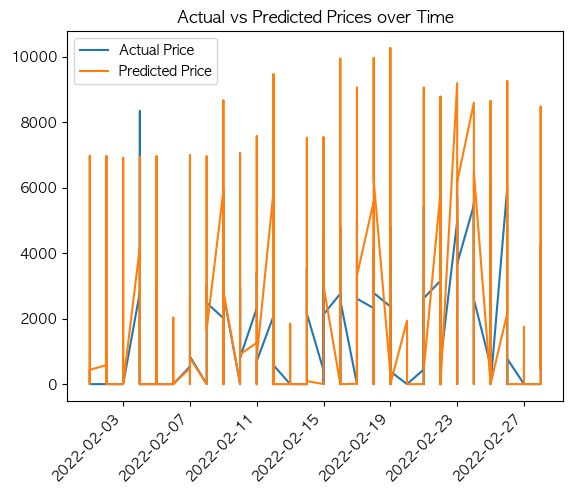

In [41]:
from matplotlib import dates

test_data_sorted = test_data.sort_values(by='timestamp')
plt.plot(test_data_sorted['timestamp'], test_data_sorted['price(원/kg)'], label='Actual Price')
plt.plot(test_data_sorted['timestamp'], test_data_sorted['predicted_price'], label='Predicted Price')
# plt.plot(test_predictions)
plt.title('Actual vs Predicted Prices over Time')
plt.xticks(rotation=45, ha="right") 
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(dates.DayLocator(interval=4))
plt.show()

In [42]:
print(test_data.columns)

Index(['item', 'corporation', 'location', 'ID', 'timestamp', 'price(원/kg)',
       'year', 'month', 'day', 'dayofweek', 'predicted_price'],
      dtype='object')


shap

In [43]:
# import shap
# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_test)

# # 특정 샘플에 대한 shap summary plot 
# shap.summary_plot(shap_values, X_test)

In [44]:
# shap.plots.force(explainer.expected_value, shap_values)
